### Objective: 
* To predict the costs of used cars given the data collected from various sources and distributed across various locations in India.

 FEATURES:
1. Name: The brand and model of the car.
2. Location: The location in which the car is being sold or is available for purchase.
3. Year: The year or edition of the model.
4. Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.
5. Fuel_Type: The type of fuel used by the car.
6. Transmission: The type of transmission used by the car.
7. Owner_Type: Whether the ownership is Firsthand, Second hand or other.
8. Mileage: The standard mileage offered by the car company in kmpl or km/kg
9. Engine: The displacement volume of the engine in cc.
10. Power: The maximum power of the engine in bhp.
11. Seats: The number of seats in the car.
12. Price: The price of the used car in INR Lakhs.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from seaborn import heatmap



### Data Acquisition and Exploration

In [2]:
# Reading The Data From Excel File Both Test Excel File And Train File
data_set_Train = pd.read_excel("data_train.xlsx")
data_set_Test = pd.read_excel("data_test.xlsx")
print(data_set_Train.head())
print(data_set_Test.head())

                               Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   Price  
0   1.75  
1  12.50  
2   4.50  
3   6.00  
4  17.74  
        

In [3]:
#List of feature column in the Datasets
print("Number of features in the datasets :")
print("Training Set : ", list(data_set_Train.columns))
print("Test Set : ",list(data_set_Test.columns))

Number of features in the datasets :
Training Set :  ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
Test Set :  ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']


In [4]:
#checking the number of features in the Datasets
print("Number of features in the datasets :")
print("Training Set : ", len(data_set_Train.columns))
print("Test Set : ",len(data_set_Test.columns))

Number of features in the datasets :
Training Set :  12
Test Set :  11


In [5]:
#checking the data types of features
print("Datatypes of features in the datasets :")
print("Training Set : \n", data_set_Train.dtypes)
print("Test Set : \n",data_set_Test.dtypes)

Datatypes of features in the datasets :
Training Set : 
 Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object
Test Set : 
 Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
dtype: object


In [6]:
#checking the number of rows in the Datasets
print("Number of rows in the datasets :")
print("Training Set : ", len(data_set_Train))
print("Test Set : ",len(data_set_Test))

Number of rows in the datasets :
Training Set :  6019
Test Set :  1234


In [7]:
# Calculating how many are null of each type For Both Test Excel File And Train File
print(data_set_Train.isnull().sum())
print(data_set_Test.isnull().sum())

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64


### Data Cleaning

In [8]:
# Split Function For Data Preparation for both Test Excel File And Train File
def split_data(string):
    string = string.split(" ")
    if string[0] == 'null':
        return None
    return float(string[0])

In [9]:
# Dropping those null data for both Test Excel File And Train File
data_set_Train.dropna(inplace=True)
data_set_Test.dropna(inplace=True)

In [10]:

# Using The Above Split Function for both Test Excel File And Train File
data_set_Train["Mileage"] = data_set_Train["Mileage"].apply(split_data)
data_set_Train["Engine"] = data_set_Train["Engine"].apply(split_data)
data_set_Train["Power"] = data_set_Train["Power"].apply(split_data)

data_set_Test["Mileage"] = data_set_Test["Mileage"].apply(split_data)
data_set_Test["Engine"] = data_set_Test["Engine"].apply(split_data)
data_set_Test["Power"] = data_set_Test["Power"].apply(split_data)

In [11]:
# Dropping those null data for both Test Excel File And Train File
data_set_Train.dropna(inplace=True)
data_set_Test.dropna(inplace=True)

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64


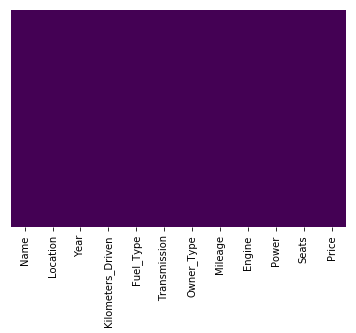

In [12]:
# Calculating how many are null of each type for both Test Excel File And Train File
print(data_set_Train.isnull().sum())
print(data_set_Test.isnull().sum())
heatmap(data_set_Train.isnull(),cmap='viridis',cbar=False,yticklabels=False)


In [13]:
# Coping Test Excel File
data_set_Test_ = data_set_Test.copy()

# Seeing the different Columns for both Test Excel File And Train File
print(data_set_Train.columns)
print(data_set_Test.columns)


Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')
Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats'],
      dtype='object')


### Visualization

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DCA1D07160>,
      dtype=object)

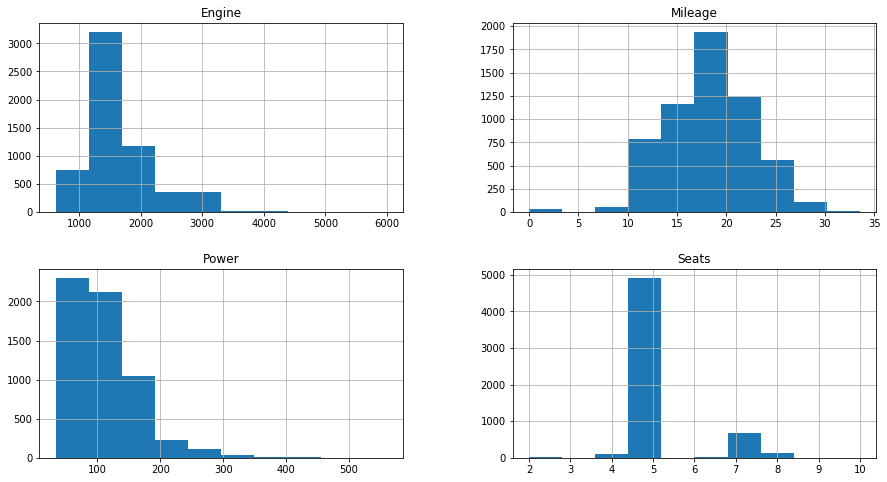

In [15]:
# Univariate visualisation for quantative features
features = ['Mileage', 'Engine','Power','Seats']
data_set_Train[features].hist(figsize=(15, 8))

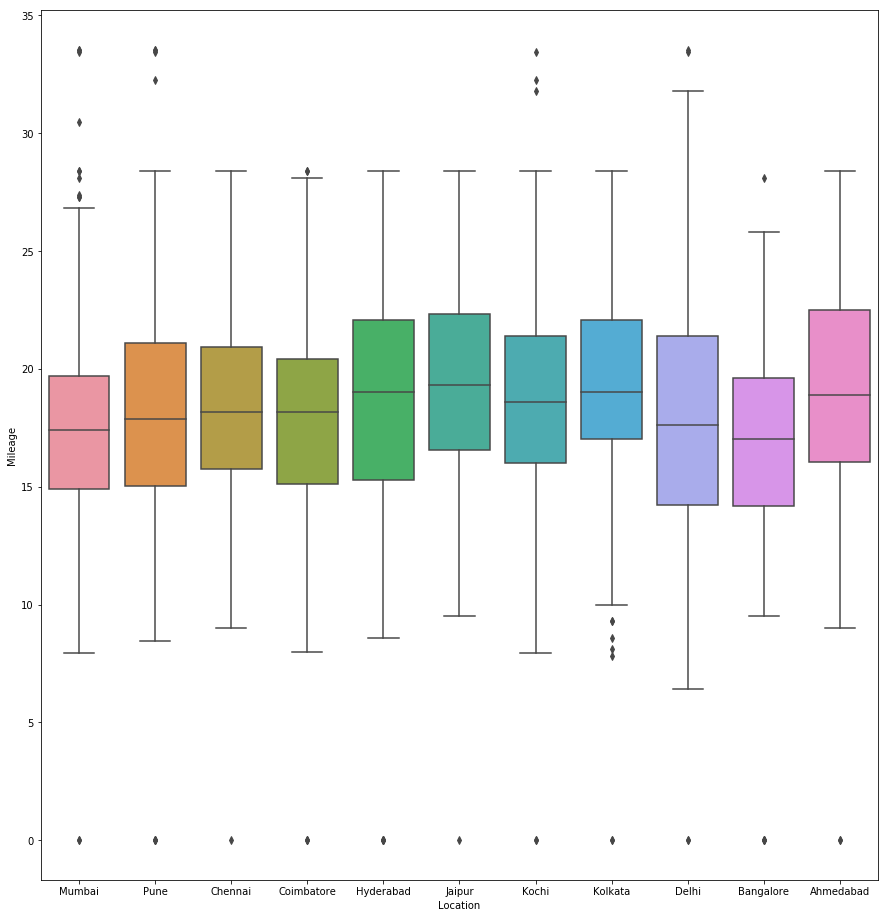

In [16]:
import seaborn as sns


#multivariate visualisation for 2 vaariables Location and mileage
plt.figure(figsize=(15,16))
sns.boxplot(x = 'Location', y = 'Mileage', data = data_set_Train) 

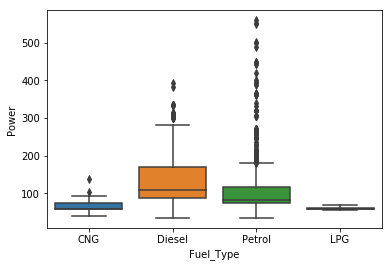

In [17]:
sns.boxplot(x = 'Fuel_Type', y = 'Power', data = data_set_Train) 

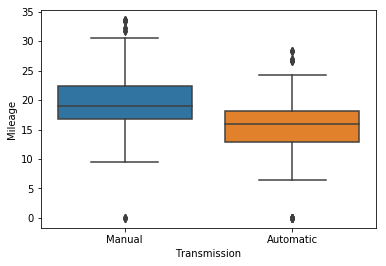

In [18]:
sns.boxplot(x = 'Transmission', y = 'Mileage', data = data_set_Train) 

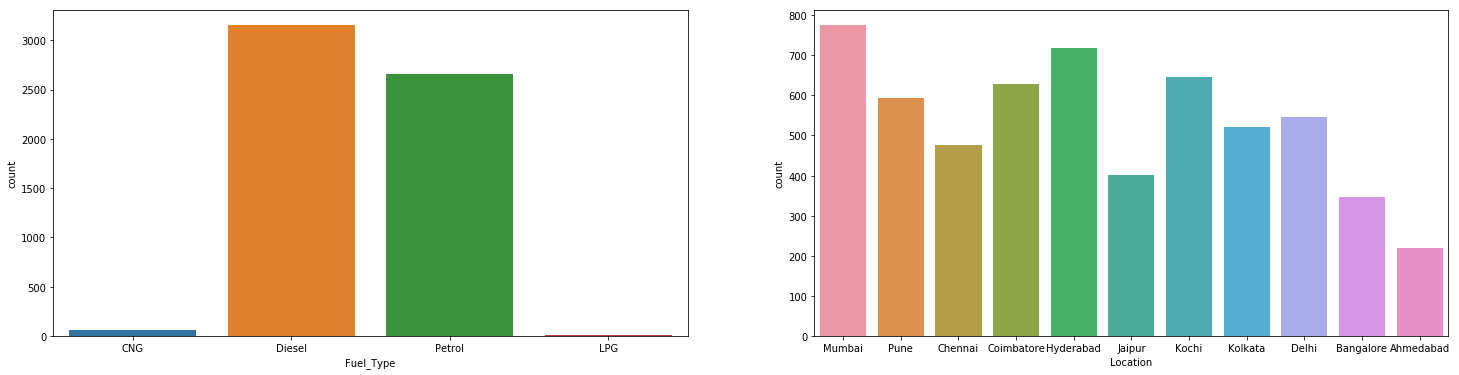

In [19]:
#Categorical vairiables visualizations
_,ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 6))
sns.countplot(x='Fuel_Type', data=data_set_Train, ax=ax[0]);
sns.countplot(x='Location', data=data_set_Train, ax=ax[1]);

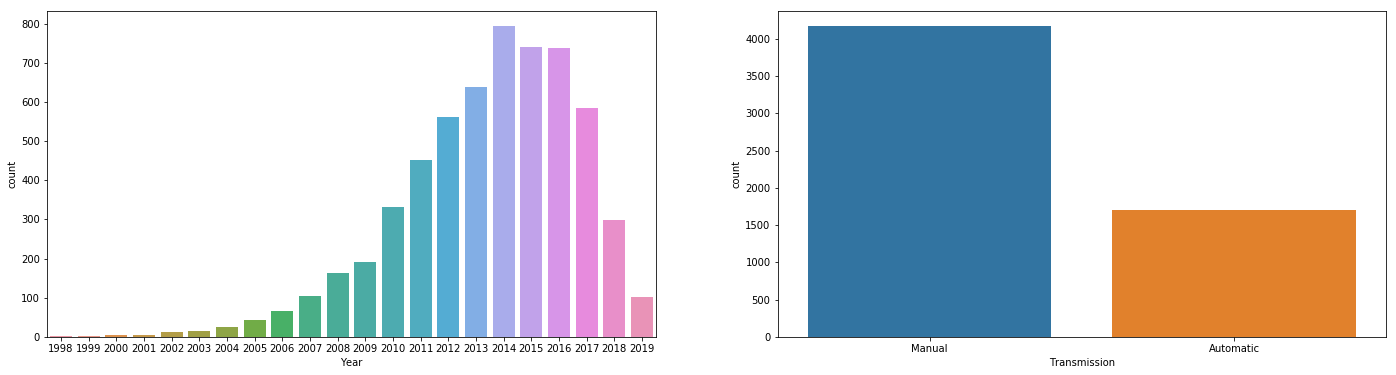

In [20]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
sns.countplot(x='Year', data=data_set_Train, ax=ax[0]);
sns.countplot(x='Transmission', data=data_set_Train, ax=ax[1]);

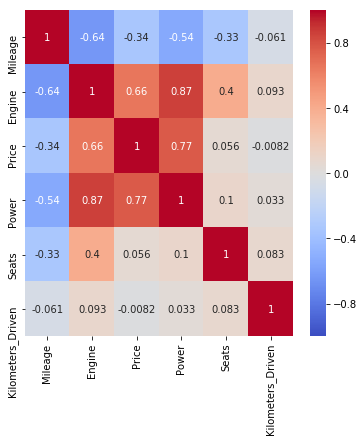

In [21]:
#correlation matrix for numerical variables
# Drop non-numerical variables
numerical_var = list(set(data_set_Train.columns) - 
                 set(['Location', 'Year', 'Fuel_Type', 
                      'Transmission', 'Owner_Type', 'Brand','Model']))

# Calculate and plot with annotated correlation
corr_matrix = data_set_Train[numerical_var].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, vmin=-1,
            cmap='coolwarm',
            annot=True);

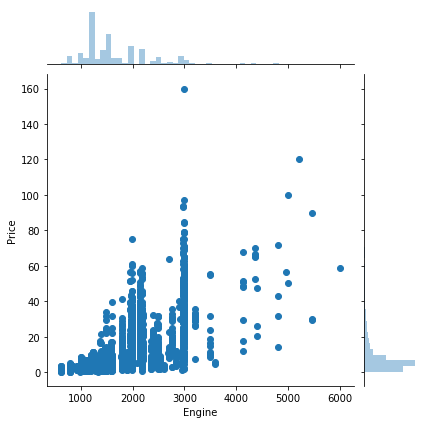

In [22]:
#multivariate visualisation like scatterplot for 2 variables
sns.jointplot(x='Engine', y='Price', 
              data=data_set_Train, kind='scatter');

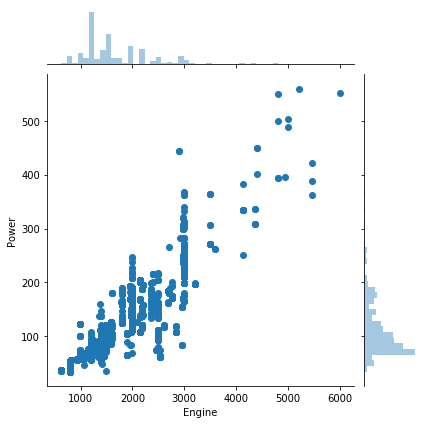

In [23]:
#multivariate visualisation
sns.jointplot(x='Engine', y='Power', 
              data=data_set_Train, kind='scatter');

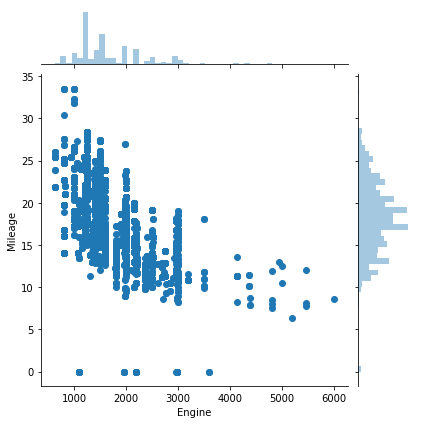

In [24]:
#multivariate visualisation
sns.jointplot(x='Engine', y='Mileage', 
              data=data_set_Train, kind='scatter');

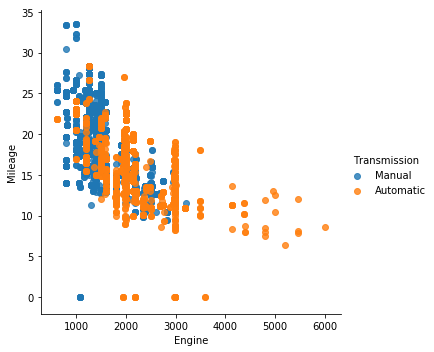

In [25]:
#Quantitative vs. Categorical multivariate visualisation
sns.lmplot('Engine', 'Mileage', data=data_set_Train, hue='Transmission', fit_reg=False);

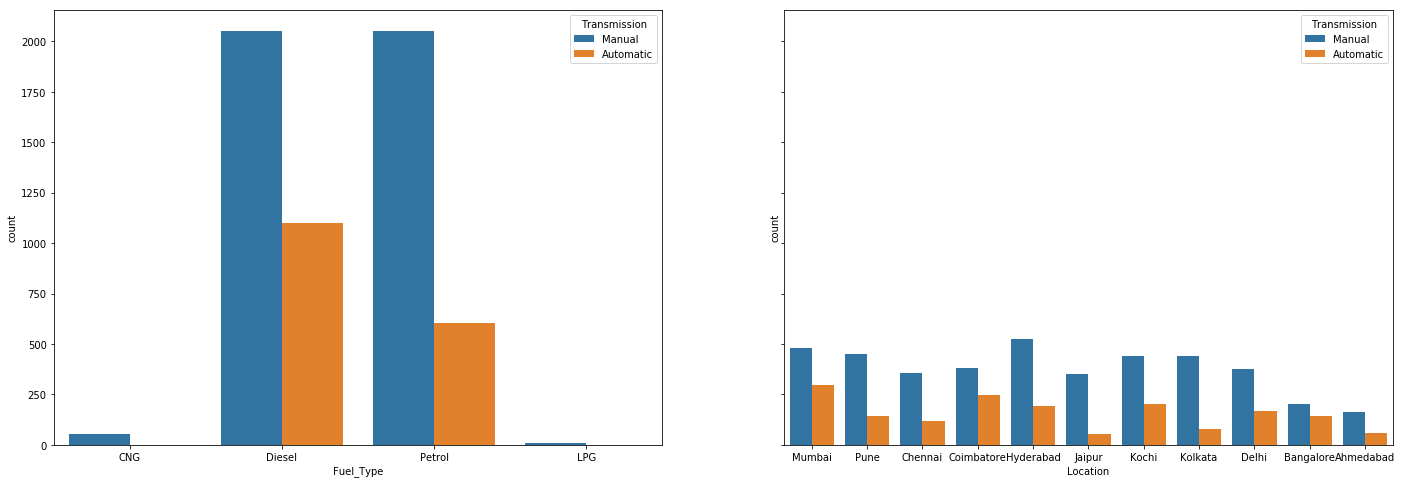

In [26]:
#Categorical vs. Categorical
_, ax = plt.subplots(1, 2, sharey=True, figsize=(24, 8))

sns.countplot(x='Fuel_Type', hue='Transmission', data=data_set_Train, ax=ax[0]);
sns.countplot(x='Location', hue='Transmission', data=data_set_Train, ax=ax[1]);

### Modeling Phase

In [27]:
# Encoding Values for both Test Excel File And Train File
data_set_Train.iloc[:, 5] = LabelEncoder().fit_transform(data_set_Train.iloc[:, 5])
data_set_Train.iloc[:, 0] = LabelEncoder().fit_transform(data_set_Train.iloc[:, 0])
data_set_Train.iloc[:, 6] = LabelEncoder().fit_transform(data_set_Train.iloc[:, 6])
data_set_Train.iloc[:, 4] = LabelEncoder().fit_transform(data_set_Train.iloc[:, 4])
data_set_Train.iloc[:, 1] = LabelEncoder().fit_transform(data_set_Train.iloc[:, 1])
data_set_Train.iloc[:, 2] = LabelEncoder().fit_transform(data_set_Train.iloc[:, 2])

data_set_Test.iloc[:, 5] = LabelEncoder().fit_transform(data_set_Test.iloc[:, 5])
data_set_Test.iloc[:, 0] = LabelEncoder().fit_transform(data_set_Test.iloc[:, 0])
data_set_Test.iloc[:, 6] = LabelEncoder().fit_transform(data_set_Test.iloc[:, 6])
data_set_Test.iloc[:, 4] = LabelEncoder().fit_transform(data_set_Test.iloc[:, 4])
data_set_Test.iloc[:, 1] = LabelEncoder().fit_transform(data_set_Test.iloc[:, 1])
data_set_Test.iloc[:, 2] = LabelEncoder().fit_transform(data_set_Test.iloc[:, 2])

In [28]:
# Extracting Values Training Excel File
X_train = data_set_Train.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]].values
# Extracting Values Training Excel File
X_Test_Excel = data_set_Test.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]].values

# Extracting Values Training Excel File
Y_train = data_set_Train.iloc[:, 11].values

# Adding Columns of 1 Extracting Values Training Excel File
X_train = np.append(arr=np.ones((len(X_train), 1)).astype(float), values=X_train, axis=1)
X_Test_Excel = np.append(arr=np.ones((len(X_Test_Excel), 1)).astype(int), values=X_Test_Excel, axis=1)

In [29]:
# Splitting DataSet into Test, Train For Training Excel file
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, random_state=0, train_size=0.8)
sc_X = StandardScaler()
sc_Y = StandardScaler()
Y_true = Y_test
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

C:\Users\shubh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [30]:
print(" ========================================================= ")
print("Multiple Regression (For Training Excel file)")
model_1 = LinearRegression().fit(X_train, Y_train)
predictions = model_1.predict(X_test)
print(Y_test)

for i in range(len(predictions)):
    if predictions[i] < 0:
        predictions[i] = 0
print(predictions)
print("Mean Squared Error = ", mean_squared_error(Y_test, predictions))

Multiple Regression (For Training Excel file)
[ 0.85 10.94  3.   ...  3.2  14.    2.9 ]
[ 0.         15.45930682  0.         ...  4.38652413 19.77875204
  4.27639006]
Mean Squared Error =  36.42734926857945


In [31]:
print(" ========================================================= ")

print("Polynomial Regression (For Training Excel file)")
polynomial = LinearRegression()
poly_reg = PolynomialFeatures(degree=2)
X_poly_train = poly_reg.fit_transform(X_train)
# poly_reg.fit(X_poly_train, Y_train)
X_poly_test = poly_reg.transform(X_test)
model_5 = polynomial.fit(X_poly_train, Y_train)
predictions = model_5.predict(X_poly_test)
print(Y_test)
print(predictions)
print("Mean Squared Error = ", mean_squared_error(Y_test, predictions))

Polynomial Regression (For Training Excel file)
[ 0.85 10.94  3.   ...  3.2  14.    2.9 ]
[ 3.21714335 15.7418411  -0.39379194 ...  3.69361466 14.65101923
  2.64360914]
Mean Squared Error =  17.372415646899956


In [32]:
print(" ========================================================= ")

print("Decision Tree Regression (For Training Excel file)")
decision_tree = DecisionTreeRegressor(random_state=0)
model_2 = decision_tree.fit(X_train, Y_train)
predictions = model_2.predict(X_test)
print(Y_test)
print(predictions)
print("Mean Squared Error = ", mean_squared_error(Y_test, predictions))

Decision Tree Regression (For Training Excel file)
[ 0.85 10.94  3.   ...  3.2  14.    2.9 ]
[ 1.05 13.54  1.8  ...  3.87  9.5   3.75]
Mean Squared Error =  21.557877148936168


In [33]:
print(" ========================================================= ")

print("Random Forest Regression (For Training Excel file)")
random_forest = RandomForestRegressor(n_estimators=1000)
model_3 = random_forest.fit(X_train, Y_train)
predictions = model_3.predict(X_test)
print(Y_test)
print(predictions)
print("Mean Squared Error = ", mean_squared_error(Y_test, predictions))

Random Forest Regression (For Training Excel file)
[ 0.85 10.94  3.   ...  3.2  14.    2.9 ]
[ 1.21458 12.78345  2.10694 ...  4.13182 13.76818  3.70205]
Mean Squared Error =  11.179065985246663


In [34]:
print(" ========================================================= ")

print("K-Nearest Neighbor (For Training Excel file)")
k_nearest = KNeighborsRegressor()
model_4 = k_nearest.fit(X_train, Y_train)
predictions = model_4.predict(X_test)
print(Y_test)
print(predictions)
print("Mean Squared Error = ", mean_squared_error(Y_test, predictions))

print(" ========================================================= ")


K-Nearest Neighbor (For Training Excel file)
[ 0.85 10.94  3.   ...  3.2  14.    2.9 ]
[ 1.42   7.75   1.98  ...  5.16  13.552  4.27 ]
Mean Squared Error =  17.50616807489362


In [35]:
# Test File Excel
# For Test Set (Only Predictions)

# Scaling X Values
sc_X = StandardScaler()
X_Test_Excel = sc_X.fit_transform(X_Test_Excel)



In [36]:
# Predicting Using Multiple Regression
print("Multiple Regression (For Testing Excel file)")
predictions_Test = model_1.predict(X_Test_Excel)
for i in range(len(predictions_Test)):
    if predictions_Test[i] < 0:
        predictions_Test[i] = 0
print(predictions_Test)
print(" ========================================================= ")


Multiple Regression (For Testing Excel file)
[ 2.94433019  0.         17.58630017 ...  0.57643677  7.9260669
 23.15917037]


In [37]:
print("Polynomial Regression (For Testing Excel file)")
X_Test_Excel_poly = poly_reg.transform(X_Test_Excel)
predictions_Test_1 = model_5.predict(X_Test_Excel_poly)
for i in range(len(predictions_Test_1)):
    if predictions_Test_1[i] < 0:
        predictions_Test_1[i] = 0
print(predictions_Test_1)


Polynomial Regression (For Testing Excel file)
[ 4.5751314   1.4738123  17.99525381 ...  3.4862939   2.31642523
 23.14699745]


In [38]:
print(" ========================================================= ")

print("Decision Tree (For Testing Excel file)")
print(model_2.predict(X_Test_Excel))
print(" ========================================================= ")

print("Random Forest Regression (For Testing Excel file)")
print(model_3.predict(X_Test_Excel))
print(" ========================================================= ")

print("K-Nearest Neighbors Regression (For Testing Excel file)")
print(model_4.predict(X_Test_Excel))
print(" ========================================================= ")

Decision Tree (For Testing Excel file)
[ 3.3  2.1 16.5 ...  2.4  5.4 12.9]
Random Forest Regression (For Testing Excel file)
[ 3.36036417  2.69241    15.48022    ...  2.71392     5.05325667
 16.77542167]
K-Nearest Neighbors Regression (For Testing Excel file)
[ 3.9    3.374 17.792 ...  3.17   6.12  22.732]


In [39]:
predictions_1 = predictions_Test
predictions_2 = model_2.predict(X_Test_Excel)
predictions_3 = model_3.predict(X_Test_Excel)
predictions_4 = model_4.predict(X_Test_Excel)
predictions_5 = predictions_Test_1

data_set_Test_["Prices From Multiple Regression"] = predictions_1
data_set_Test_["Prices From Decision Tree Regression"] = predictions_2
data_set_Test_["Prices From Random Fores Regression"] = predictions_3
data_set_Test_["Prices From K-NN Regression"] = predictions_4
data_set_Test_["Prices From Polynomial Regression"] = predictions_5



In [40]:
data_set_Test_

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Prices From Multiple Regression,Prices From Decision Tree Regression,Prices From Random Fores Regression,Prices From K-NN Regression,Prices From Polynomial Regression
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,2.944330,3.30,3.360364,3.900,4.575131
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,0.000000,2.10,2.692410,3.374,1.473812
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,17.586300,16.50,15.480220,17.792,17.995254
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,3.723275,5.35,4.712410,4.930,4.165000
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.00,2179.0,140.00,7.0,16.075379,35.00,14.060400,7.850,13.011781
6,Toyota Fortuner 4x2 AT TRD Sportivo,Pune,2015,59000,Diesel,Automatic,First,12.55,2982.0,168.70,7.0,20.925587,19.03,20.942983,21.328,22.739335
7,Hyundai EON Era Plus,Jaipur,2013,65000,Petrol,Manual,First,21.10,814.0,55.20,5.0,0.000000,2.41,2.293750,2.878,2.880369
8,Honda City 1.5 S MT,Mumbai,2011,66000,Petrol,Manual,Second,17.00,1497.0,118.00,5.0,5.483928,3.75,3.807790,4.222,2.384097
9,Mahindra XUV500 W6 2WD,Coimbatore,2015,54684,Diesel,Manual,First,15.10,2179.0,140.00,7.0,15.379133,10.00,12.792360,12.056,14.172784
10,Audi Q5 2008-2012 2.0 TDI,Mumbai,2012,78000,Diesel,Automatic,Second,12.80,1968.0,167.60,5.0,19.341996,11.50,16.734110,13.190,15.737706
